# CRITICAL INFRASTRUCTURE AND DIGITALISATION

## Workshop 2: Simulation Mobility Systems

Welcome to the 2nd Workshop!

This notebook is used to collect meaningful data from the simulation you will run during the workshop. The python script is structured in an object oriented way, meaning that dataframes imported from log documents are stored in a 'mosaic' object. If you think you have a good command of the programming language, you can call and manipulate them repeatedly on a new cell of jupyter notebook. 
The data we provide you with will be largely sufficient for this workshop, so you are not expected to manipulate the data again, but rather to observe how parameter changes affect the results.  However, if during your research you notice a data set with a different structure, you can edit or calculate it on this notebook.

For questions, troubleshooting and bugs please reach out to Muzaffer Citir (muzaffer.citir@campus.tu-berlin.de) or Philipp Wiesner (wiesner@tu-berlin.de)

In [11]:
import os
import pandas as pd
from cid_mosaic import Mosaic

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Initialize the toolbox using the absolute path to your Eclipse MOSAIC installation.

In [2]:
mosaic = Mosaic(mosaic_path=os.path.join(os.getcwd(), "eclipse-mosaic-22.0"))

The path for the logs: /Users/philippwiesner/Dev/cid-mobility-workshop/eclipse-mosaic-22.0/logs
Log List size is 20
Loading latest simulation result 'log-20220620-152435-Barnim'


The method `run_simulation()` will run the selected simulation and display the terminal output in the notebook.

- If you set `visualize=True`, the Mosaic visualizer will open in a new tab. Setting `visualize=False` might improve simulation speed.
- If you set a `sim_speed`, the simulation will be slowed down to a desired Real Time Factor. For example, use `sim_speed=1` to execute the simulation in real time or `sim_speed=10` to execute ten times faster than real time. `sim_speed=None` executes simulations as fast as possible.

In [3]:
mosaic.run_simulation(visualize=False, sim_speed=None)

Running: ./mosaic.sh -s Barnim
2022-06-20 15:29:30,885 INFO  ROOT - Running Eclipse MOSAIC 22.0 on Java JRE v18.0.1.1 (Homebrew)
2022-06-20 15:29:30,963 INFO  FederationManagement - Start federation with id 'Barnim'
2022-06-20 15:29:30,963 INFO  FederationManagement - Add ambassador/federate with id 'application'
2022-06-20 15:29:30,963 INFO  FederationManagement - Add ambassador/federate with id 'environment'
2022-06-20 15:29:30,964 INFO  FederationManagement - Add ambassador/federate with id 'mapping'
2022-06-20 15:29:30,964 INFO  FederationManagement - Add ambassador/federate with id 'cell'
2022-06-20 15:29:30,964 INFO  FederationManagement - Add ambassador/federate with id 'sns'
2022-06-20 15:29:30,964 INFO  FederationManagement - Add ambassador/federate with id 'sumo'
2022-06-20 15:29:30,964 INFO  FederationManagement - Deploying federate 'sumo' locally in ./tmp/sumo
2022-06-20 15:29:30,973 INFO  FederationManagement - Starting federate 'sumo' locally in ./tmp/sumo
2022-06-20 15:2

In [4]:
result = mosaic.import_data()
result.df_vehicle_updates.head()

,Event,Time,Name,RouteId,RoadPositionLaneIndex,VehicleEmissionsCurrentEmissionsCo2,VehicleEmissionsAllEmissionsCo2
51,VEHICLE_UPDATES,7000000000,veh_0,2.0,0.0,0.000000,24964.119444
53,VEHICLE_UPDATES,8000000000,veh_0,2.0,0.0,42599.748257,67563.867702
57,VEHICLE_UPDATES,9000000000,veh_0,2.0,0.0,79850.351684,147414.219386
58,VEHICLE_UPDATES,9000000000,veh_1,1.0,1.0,0.000000,24964.119444
60,VEHICLE_UPDATES,10000000000,veh_0,2.0,0.0,0.000000,147414.219386


In [5]:
cumulative_df = pd.merge(result.df_vehicle_updates, result.df_vehicle_registration[['Name','MappingGroup']], how='left')
cumulative_df = pd.merge(cumulative_df, result.df_vehicle_registration[['Name','MappingVehicleTypeVehicleClass']], how='left')
all_vehicles = result.df_vehicle_registration.Name.unique().tolist()
adhoc_vehicles = cumulative_df.loc[cumulative_df['MappingGroup']=='AdHoc'].Name.unique().tolist()
cellular_vehicles = cumulative_df.loc[cumulative_df['MappingGroup']=='Cellular'].Name.unique().tolist()
unequipped_vehicles = cumulative_df.loc[cumulative_df['MappingGroup']=='Unequipped'].Name.unique().tolist()
vehicles_having_routeId_2 = cumulative_df.loc[cumulative_df['RouteId']==2.0].Name.unique().tolist()
cellular_vehicles_having_routeId_2 = cumulative_df.loc[(cumulative_df['RouteId']==2.0) & (cumulative_df['MappingGroup']=='Cellular')].Name.unique().tolist()
adhoc_vehicles_having_routeId_2 = cumulative_df.loc[(cumulative_df['RouteId']==2.0) & (cumulative_df['MappingGroup']=='AdHoc')].Name.unique().tolist()

# Calculate how many vehicles alread got messages from the V2X network
list_of_vehicles_got_message = result.df_navigation_log['Vehicles_List'].values

# Calculate how many vehicles already set the 'targetSpeed=6.94'
list_of_vehicles_past_through_hazardous_zone = result.df_traffic_log[14].loc[result.df_traffic_log[15].str.contains('targetSpeed=6.94')==True]

# Print Info
print(f"Total {len(all_vehicles)} vehicles in the simulation. (AdHoc: {len(adhoc_vehicles)}, Cellular: {len(cellular_vehicles)}, Unequipped: {len(unequipped_vehicles)})")
print(f"\nStatistics from Navigation.log file")
print(f"- Total {len(list_of_vehicles_got_message.tolist())} vehicles got messages from the V2X network due to changing route.")
print(f"- {len(adhoc_vehicles_having_routeId_2)} adhoc and {len(cellular_vehicles_having_routeId_2)} cellular vehicle(s) updated the route!")
print(f"\nStatistics from  Traffic.log file")
print(f"- {len(list_of_vehicles_past_through_hazardous_zone)} vehicle(s) passed through the hazardous zone.")


Total 200 vehicles in the simulation. (AdHoc: 100, Cellular: 60, Unequipped: 40)

Statistics from Navigation.log file
- Total 138 vehicles got messages from the V2X network due to changing route.
- 78 adhoc and 60 cellular vehicle(s) updated the route!

Statistics from  Traffic.log file
- 62 vehicle(s) passed through the hazardous zone.


In [6]:
adhoc_transmitter = result.df_v2x_message_transmission.loc[result.df_v2x_message_transmission['MessageRoutingDestinationType'] == 'AD_HOC_GEOCAST']
cellular_transmitter = result.df_v2x_message_transmission.loc[result.df_v2x_message_transmission['MessageRoutingDestinationType'] == 'CELL_GEOCAST']
all_receiver = pd.merge(result.df_v2x_message_reception, result.df_vehicle_registration[['Name','MappingGroup']], how='left')
adhoc_receiver = all_receiver.loc[all_receiver['MappingGroup']=='AdHoc']
cellular_receiver = all_receiver.loc[all_receiver['MappingGroup']=='Cellular']

print("\nAdhoc")
print(f"- {adhoc_transmitter.groupby(['Name']).size().sum()} messages transmitted by {adhoc_transmitter.groupby(['Name']).size().count()} Adhoc vehicle(s)")
print(f"- {adhoc_receiver.groupby(['Name']).size().sum()} messages received by {adhoc_receiver.groupby(['Name']).size().count()} Adhoc vehicle(s)")

print("\nCellular")
if cellular_transmitter.loc[cellular_transmitter.Name.str.contains('server')].Name.nunique() > 0:
    print(f"- {cellular_transmitter.groupby(['Name']).size().sum()} messages transmitted by {cellular_transmitter.Name.nunique() - cellular_transmitter.loc[cellular_transmitter.Name.str.contains('server')].Name.nunique()} Cellular vehicle(s)")
    print(f"- {cellular_transmitter.loc[cellular_transmitter.Name.str.contains('server')].Name.nunique()} server(s) and {cellular_receiver.groupby(['Name']).size().sum()} messages received by {cellular_receiver.groupby(['Name']).size().count()} Cellular vehicle(s)")
else:
    print(f"- {cellular_transmitter.groupby(['Name']).size().sum()} messages transmitted by {cellular_transmitter.Name.nunique()} Cellular vehicle(s)")
    print(f"- {cellular_receiver.groupby(['Name']).size().sum()} messages received by {cellular_receiver.groupby(['Name']).size().count()} Cellular vehicle(s)")



Adhoc
- 4511 messages transmitted by 22 Adhoc vehicle(s)
- 295393 messages received by 100 Adhoc vehicle(s)

Cellular
- 500 messages transmitted by 0 Cellular vehicle(s)
- 1 server(s) and 14778 messages received by 60 Cellular vehicle(s)


In [7]:
# Statistics of Vehicles Classes and CO2 Emissions
print(f"\nVehicle Class(es): {cumulative_df['MappingVehicleTypeVehicleClass'].unique()}")
print("Total Emmission: {:.2f} g CO2".format(cumulative_df['VehicleEmissionsCurrentEmissionsCo2'].sum()/1000))
print("Average {:.2f} g CO2 released per vehicle".format(cumulative_df[['Name','VehicleEmissionsAllEmissionsCo2']].groupby(['Name']).max().mean()[0]/1000))


Vehicle Class(es): ['HeavyGoodsVehicle']
Total Emmission: 1635048.14 g CO2
Average 8200.20 g CO2 released per vehicle


In [26]:
# Full List of Vehicles Classes and Mapping Groups
result.df_vehicle_registration.head()

,Event,Time,Name,MappingVehicleTypeVehicleClass,MappingGroup
47,VEHICLE_REGISTRATION,5000000000,veh_0,HeavyGoodsVehicle,Cellular
51,VEHICLE_REGISTRATION,7000000000,veh_1,HeavyGoodsVehicle,AdHoc
55,VEHICLE_REGISTRATION,9000000000,veh_2,HeavyGoodsVehicle,Unequipped
58,VEHICLE_REGISTRATION,11000000000,veh_3,HeavyGoodsVehicle,AdHoc
62,VEHICLE_REGISTRATION,13000000000,veh_4,HeavyGoodsVehicle,Cellular


# Plotting Example

In [27]:
adhoc_receiver.head()

,Event,Time,ReceiverType,ReceiverMessageId,Name,ReceiverInformationReceiveSignalStrength,MappingGroup
240,V2X_MESSAGE_RECEPTION,83012006218,Denm,42,veh_17,0.0,AdHoc
241,V2X_MESSAGE_RECEPTION,83012838640,Denm,42,veh_29,0.0,AdHoc
242,V2X_MESSAGE_RECEPTION,83014437142,Denm,42,veh_9,0.0,AdHoc
243,V2X_MESSAGE_RECEPTION,83015899489,Denm,42,veh_15,0.0,AdHoc
244,V2X_MESSAGE_RECEPTION,83016744092,Denm,42,veh_37,0.0,AdHoc


<AxesSubplot:xlabel='Time', ylabel='Count'>

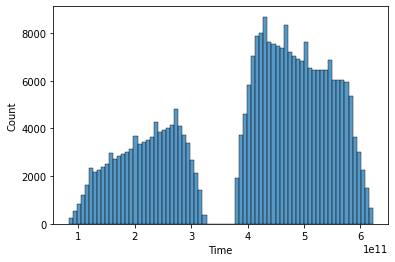

In [29]:
sns.histplot(data=adhoc_receiver, x="Time")

<AxesSubplot:xlabel='Time', ylabel='Count'>

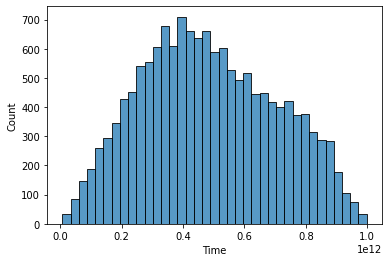

In [30]:
sns.histplot(data=cellular_receiver, x="Time")